<a href="https://colab.research.google.com/github/Bineeta05/Mini-Project/blob/main/IMAGE_CLASSIFICATION.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **IMAGE CLASSIFICATION**


In [ ]:
! pip install -q kaggle

In [ ]:
from google.colab import files
files.upload()

#Choose the kaggle.json file that you downloaded

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"bineetapanja05","key":"02cde57eaf1f9235090a1ab9758afa40"}'}

In [ ]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/

#Make directory named kaggle and copy kaggle.json file there.

In [ ]:
! chmod 600 ~/.kaggle/kaggle.json

#Change the permissions of the file.

In [ ]:
#Upgrade again  if upper step does not upgrade by using :
!pip install --upgrade --force-reinstall --no-deps kaggle

     |████████████████████████████████| 61kB 3.8MB/s 
  Created wheel for kaggle: filename=kaggle-1.5.12-cp37-none-any.whl size=73053 sha256=23b8a6de9d3f72463cb593dc1e1343be3fc90b9514a8c7be327dfe722f7daf70
  Stored in directory: /root/.cache/pip/wheels/a1/6a/26/d30b7499ff85a4a4593377a87ecf55f7d08af42f0de9b60303
Successfully built kaggle
  Found existing installation: kaggle 1.5.12
    Uninstalling kaggle-1.5.12:
      Successfully uninstalled kaggle-1.5.12


In [ ]:
!kaggle -v

Kaggle API 1.5.12


In [ ]:
! kaggle datasets list


ref                                                         title                                              size  lastUpdated          downloadCount  voteCount  usabilityRating  
----------------------------------------------------------  ------------------------------------------------  -----  -------------------  -------------  ---------  ---------------  
gpreda/reddit-vaccine-myths                                 Reddit Vaccine Myths                              229KB  2021-06-17 20:28:04           7752        671  1.0              
crowww/a-large-scale-fish-dataset                           A Large Scale Fish Dataset                          3GB  2021-04-28 17:03:01           4725        389  0.9375           
imsparsh/musicnet-dataset                                   MusicNet Dataset                                   22GB  2021-02-18 14:12:19           1584        137  1.0              
dhruvildave/wikibooks-dataset                               Wikibooks Dataset             

**Download dataset from kaggle:**

In [ ]:
!kaggle datasets download -d chetankv/dogs-cats-images

 98% 427M/435M [00:03<00:00, 105MB/s]
100% 435M/435M [00:03<00:00, 137MB/s]


In [ ]:
!ls

dogs-cats-images.zip  kaggle.json  sample_data


In [ ]:
#Unzip the dataset and remove the zip folder:
!unzip \dogs-cats-images.zip  && rm dogs-cats-images.zip

Streaming output truncated to the last 5000 lines.
  inflating: dog vs cat/dataset/training_set/cats/cat.37.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.370.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3700.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3701.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3702.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3703.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3704.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3705.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3706.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3707.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3708.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3709.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.371.jpg  
  inflating: dog vs cat/dataset/training_set/cats/cat.3710.jpg  
  inflating: dog vs cat/dataset/training_se

In [ ]:
! rm -rf 'dog vs cat'

In [ ]:
! rm -rf 'dataset/training_set'

In [ ]:
#Preprocessing
#Resize
#Flattening

import os
import matplotlib.pyplot as plt
import numpy as np
from skimage.io import imread
from skimage.transform import resize


In [ ]:
target = []
images = []
flat_data = []

DATADIR = '/content/dataset/test_set'
CATEGORIES = ['cats', 'dogs'] 

for category in CATEGORIES:
  class_num = CATEGORIES.index(category)   
  path = os.path.join(DATADIR,category)   
  print(path)
  for img in os.listdir(path):
    img_array = imread(os.path.join(path,img))

    img_resized = resize(img_array,(150,150,3))       #RESIZING (Normalizes the value 0 to 1)
      
    flat_data.append(img_resized.flatten())            #FLATTENING

    images.append(img_resized)
    target.append(class_num)

flat_data = np.array(flat_data)
target = np.array(target)
images = np.array(images)


/content/dataset/test_set/cats
/content/dataset/test_set/dogs


<BarContainer object of 2 artists>

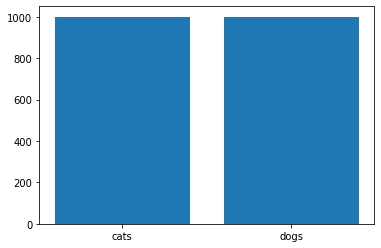

In [ ]:
unique,count = np.unique(target,return_counts=True)
plt.bar(CATEGORIES,count)
#To get count

In [ ]:
!pip install --upgrade scikit-learn

     |████████████████████████████████| 22.3MB 133kB/s 
  Found existing installation: scikit-learn 0.22.2.post1
    Uninstalling scikit-learn-0.22.2.post1:
      Successfully uninstalled scikit-learn-0.22.2.post1


In [ ]:
#Split data into training and testing
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(flat_data,target,test_size=10,random_state=109)

In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.svm import SVC  


In [ ]:
param_grid = [
              {'C':[1,10,100],'kernel':['linear']},
              {'C':[1,10,100],'gamma':[0.001],'kernel':['rbf']},
             ]


In [ ]:

clf = GridSearchCV(SVC(),param_grid,refit=True,verbose=2)
clf.fit(x_train,y_train)

Fitting 5 folds for each of 6 candidates, totalling 30 fits
[CV] END .................................C=1, kernel=linear; total time= 2.6min
[CV] END .................................C=1, kernel=linear; total time= 2.6min
[CV] END .................................C=1, kernel=linear; total time= 2.6min
[CV] END .................................C=1, kernel=linear; total time= 2.8min
[CV] END .................................C=1, kernel=linear; total time= 2.6min
[CV] END ................................C=10, kernel=linear; total time= 2.6min
[CV] END ................................C=10, kernel=linear; total time= 2.6min
[CV] END ................................C=10, kernel=linear; total time= 2.6min
[CV] END ................................C=10, kernel=linear; total time= 2.8min
[CV] END ................................C=10, kernel=linear; total time= 2.6min
[CV] END ...............................C=100, kernel=linear; total time= 2.6min
[CV] END ...............................C=100, ke

GridSearchCV(estimator=SVC(),
             param_grid=[{'C': [1, 10, 100], 'kernel': ['linear']},
                         {'C': [1, 10, 100], 'gamma': [0.001],
                          'kernel': ['rbf']}],
             verbose=2)

In [22]:
y_pred = clf.predict(x_test)
y_pred 

array([1, 0, 0, 0, 1, 1, 0, 1, 0, 1])

In [23]:
y_test

array([0, 1, 1, 0, 1, 0, 0, 0, 1, 1])

In [24]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [25]:
accuracy_score(y_pred,y_test)

0.4

In [26]:
confusion_matrix(y_pred,y_test)

array([[2, 3],
       [3, 2]])

In [27]:
#Save the model using Pickle library
import pickle
pickle.dump(clf,open('img_model.p','wb'))


In [28]:
model = pickle.load(open('img_model.p','rb'))

Enter your URL: https://cdn.fotofits.com/responsive/1200x1200/petzlover/gallery/img/l/american-eskimo-dog-779228.jpg
(1200, 1033, 3)
PREDICTED OUTPUT: dogs


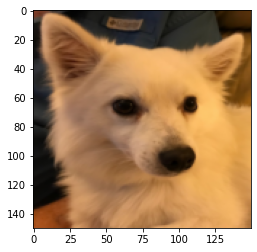

In [29]:
#Testing :

flat_data = []
url = input('Enter your URL: ')
img = imread(url)
img_resized = resize(img,(150,150,3))
flat_data.append(img_resized.flatten())
flat_data = np.array(flat_data)
print(img.shape)
plt.imshow(img_resized)
y_out = model.predict(flat_data)
y_out = CATEGORIES[y_out[0]]
print(f'PREDICTED OUTPUT: {y_out}')


In [31]:
!pip install streamlit
!pip install pyngrok
from pyngrok import ngrok


In [45]:
%%writefile app.py
import streamlit as st 
import numpy as np
from skimage.io import imread
from skimage.transform import resize
import pickle
from PIL import Image
#st.set_option('deprecaution.showfileUploaderEncoding', False)
st.title('Image Classifier')
st.text('Upload the Image')

model = pickle.load(open('img_model.p','rb'))

uploaded_file = st.file_uploader("Choose an Image...", type="jpg")
if uploaded_file is not None:
  img = Image.open(uploaded_file)
  st.image(img,caption='Uploaded Image')

  if st.button('PREDICT'):
    CATEGORIES = ['cats','dogs']

    st.write('Result...')
    flat_data = []
    img = np.array(img)
    img_resized = resize(img,(150,150,3))
    flat_data.append(img_resized.flatten())
    flat_data = np.array(flat_data)
    y_out = model.predict(flat_data)
    y_out = CATEGORIES[y_out[0]]
    st.title(f'PREDICTED OUTPUT: {y_out}')
  


Overwriting app.py


In [55]:
url = ngrok.connect(port='8501' )
url

<NgrokTunnel: "http://c947e0303d42.ngrok.io" -> "http://localhost:80">

In [56]:
!streamlit run --server.port 80 app.py >/dev/null

#!streamlit run app.py &>/dev/null     #not working
#running an app in the background